# Conceptos de Segmentación<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

# Carga de Imágen desde Github y Dropbox

In [1]:
import os
import requests
import wget
url_imagen = "https://raw.githubusercontent.com/joseramoniglesias/Tratamiento_Senales/main/clases/Cap01_Introducci%C3%B3n/Python/onerice.bmp"
#wgetcomand = "https://raw.githubusercontent.com/joseramoniglesias/Tratamiento_Senales/main/clases/Cap01_Introducci%C3%B3n/Python/onerice.bmp"
#wgetcomand = "wget https://www.dropbox.com/s/tzay0ej8irleft4/onerice.bmp"
#os.system(wgetcomand)

In [2]:
nombre_local_imagen = "onerice.bmp" # El nombre con el que queremos guardarla
imagen = requests.get(url_imagen).content
with open(nombre_local_imagen, 'wb') as handler:
  handler.write(imagen)

# Importación de Librerías

In [3]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

# Lectura y Despliegue de Imagen

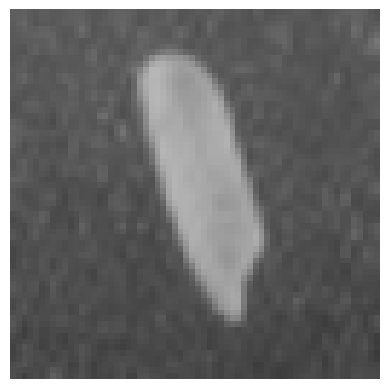

In [4]:
img = cv2.imread('onerice.bmp')
plt.axis('off')
plt.imshow(img,cmap='gray')
plt.show()

# Función de cómo es la imagen

In [7]:
def dimension(img):
  print('Tamaño = ',img.shape)
  print("Dimensiones de la imagen:\n")
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

dimension(img)

Tamano =  (64, 64, 3)
Dimensiones de la imagen:

max  =  183
min  =  59


# Selección del primer canal de la imagen

Tamano =  (64, 64)
Dimensiones de la imagen:

max  =  183
min  =  59


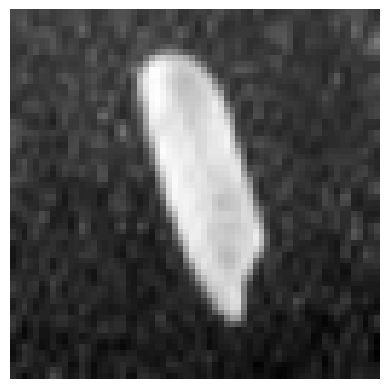

In [9]:
X = img[:,:,0]
dimension(X)
plt.axis('off')
plt.imshow(X,cmap='gray')
plt.show()

# Función de Segmentación por Umbral

In [ ]:
def segmenta(X,t):
  (N,M) = X.shape
  Y = np.zeros((N,M))
  area = 0
  for i in range(N):
    for j in range(M):
      if X[i,j] > t:
        Y[i,j] = 255
        area = area + 1
  print('area = ',area)
  return Y


# Segmentación

In [ ]:
Y = segmenta(X,120)
plt.axis('off')
plt.imshow(Y,cmap='gray')
plt.show()

# Un ejemplo más complejo

In [ ]:
url_imagen = "https://raw.githubusercontent.com/joseramoniglesias/Tratamiento_Senales/main/clases/Cap01_Introducci%C3%B3n/Matlab/rice.png"
#wgetcomand = "https://raw.githubusercontent.com/joseramoniglesias/Tratamiento_Senales/main/clases/Cap01_Introducci%C3%B3n/Matlab/rice.png"
#wgetcomand = "wget https://www.dropbox.com/s/n81hldnrcb07muh/rice.png"
#os.system(wgetcomand)

In [ ]:
nombre_local_imagen = "rice.png" # El nombre con el que queremos guardarla
imagen = requests.get(url_imagen).content
with open(nombre_local_imagen, 'wb') as handler:
  handler.write(imagen)

In [ ]:
img = cv2.imread('rice.png')
X   = img[:,:,0]
dimension(X)
plt.axis('off')
plt.imshow(X,cmap='gray')

In [ ]:
Y = segmenta(X,120)
plt.axis('off')
plt.imshow(Y,cmap='gray')

# Definición de imagen con fondo homogéneo

In [ ]:
(N,M) = X.shape
Xm    = np.zeros((N,M),np.uint8)
for i in range(N):
  xmin = np.min(X[i,:])
  Xm[i,:] = X[i,:] - xmin
plt.axis('off')
plt.imshow(Xm,cmap='gray')


In [ ]:
Y = segmenta(Xm,60)
plt.axis('off')
plt.imshow(Y,cmap='gray')

# Otros Metodos

# Umbralización Simple

Aquí, el objetivo es sencillo. Si el valor del pixel es mayor al valor del umbral, se le asigna un valor (puede ser blanco), de otro modo se le asigna otro valor (puede ser negro). La función utilizada es cv2.threshold. El primer argumento es la imagen fuente, que debería encontrarse en escala de grises. El segundo argumento es el valor del umbral que se usa para calificar los valores de pixeles. El tercer argumento es el maxVal el cual representa el valor dado si el valor del pixel es mayor que (a veces menor que) el valor del umbral. OpenCV provee diferentes estilos de umbralización y se decide por medio del cuarto parámetro de la función. Los distintos tipos son:

THRESH_BINARY
THRESH_BINARY_INV
THRESH_TRUNC
THRESH_TOZERO
THRESH_TOZERO_INV

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('rice.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
miArray = np.arange(6)
for i in miArray:
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# Umbralización Adaptativa

En la sección previa, usamos un valor global como valor umbral. Pero puede no ser bueno en todos los casos donde las imágenes difieren en cuanto a condiciones de luz en distintas áreas. En ese caso, utilizamos la umbralización adaptativa. En esta, el algoritmo calcula el umbral para una pequeña región de la imagen. Así que obtenemos diferentes umbrales para distintas regiones de la misma imagen. Y nos da mejores resultados para imágenes con iluminación variante.

Posee tres parámetros “especiales” de entrada y sólo un argumento de salida.

Metodo Adaptativo – Decide cómo el valor de umbralización es calculado.
ADAPTIVE_THRESH_MEAN_C : el valor umbral es equivalente al valor del área vecina.
ADAPTIVE_THRESH_GAUSSIAN_C : en este caso el valor umbral es la suma de los pesos de los valores vecinos donde dichos valores correspondían a pesos de una ventana gaussiana.
Block Size – Decide el tamaño del área vecina.
C – Es sólo una constante que es substraída del cálculo del medio o el peso del medio calculado.
El siguiente fragmento de código compara la umbralización global con la adaptativa para una imagen de iluminación variante:

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('rice.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
miArray = np.arange(4)
for i in miArray:
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).